In [1]:
%matplotlib inline
data_dir = '/home/hao/Research/apg_data/'
from sim_rings import *
import os

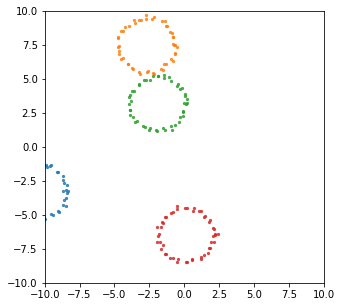

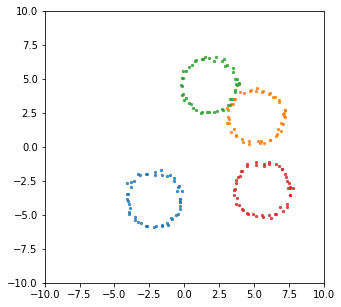

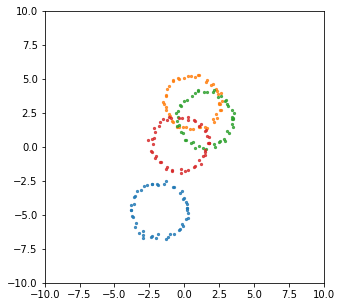

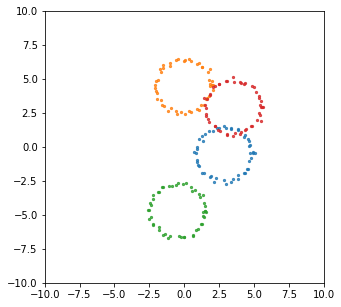

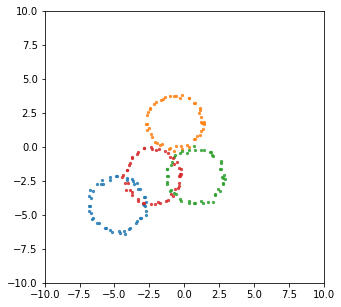

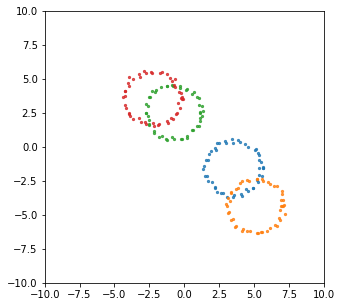

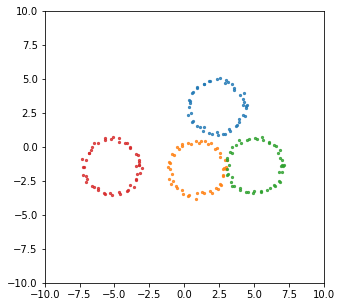

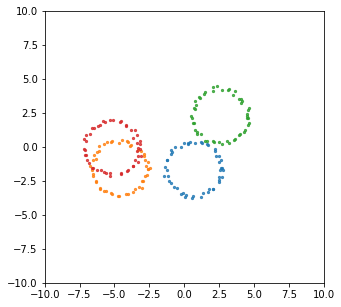

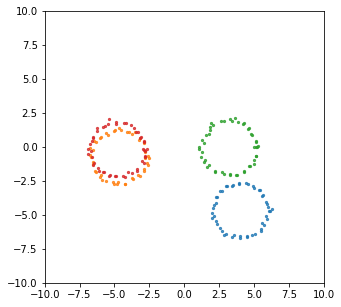

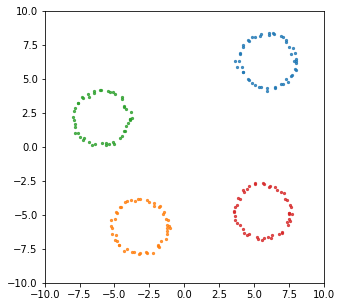

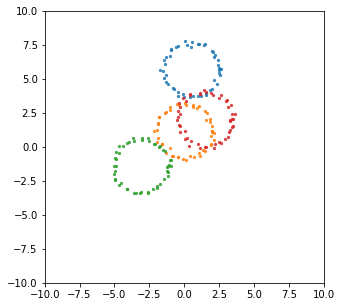

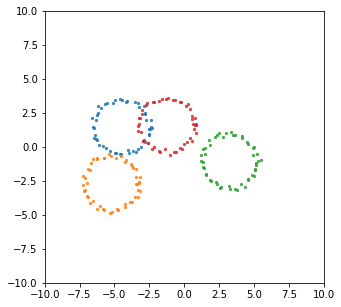

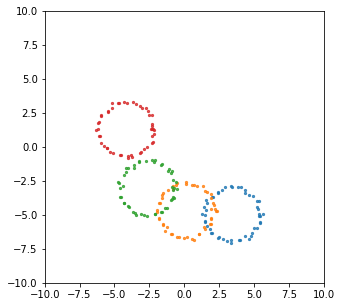

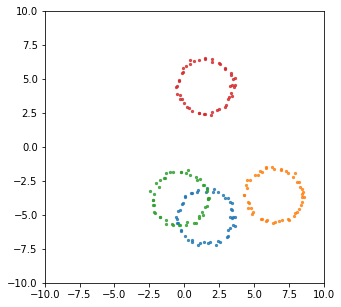

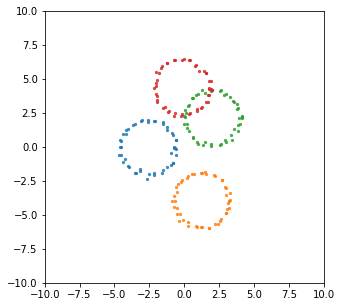

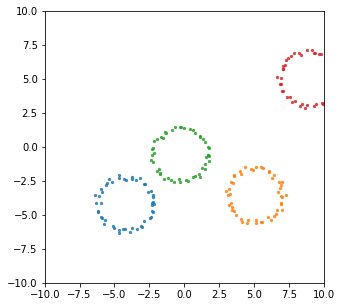

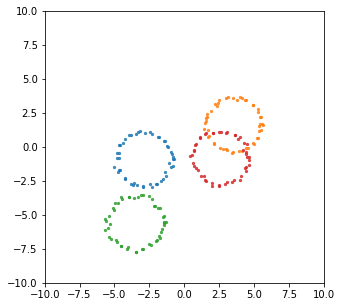

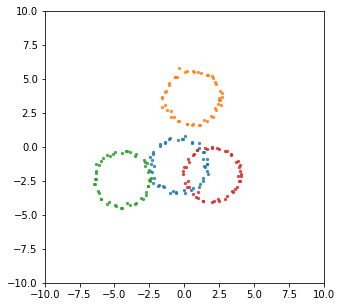

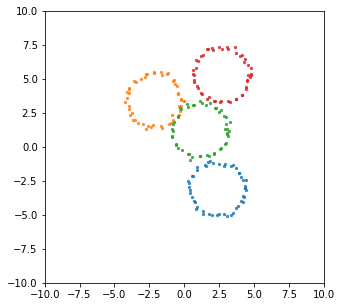

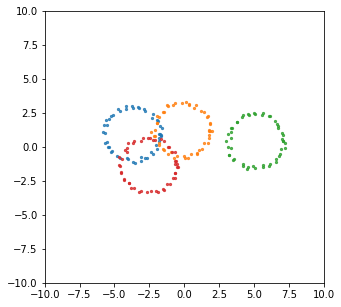

In [3]:
period = 2
bound = 10
K = 4
D = 2
radi = 2.0
noise_std = 0.1
center_std = 3.5

num_seqs = 20
# for n in range(10):
N = 50
path = data_dir + "ncmm/rings_%d" % N*K
if not os.path.exists(path):
    os.makedirs(path)
rings_obj = Rings(N, K, period, bound, center_std, noise_std, radi)
rings_obj.visual_data(num_seqs)
# rings_obj.sim_save_data(num_seqs, path)